<a href="https://colab.research.google.com/github/mayurmore5/churn_analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np # For numerical operations, especially with NaN

# Load the dataset
# Make sure 'Telco-Churn.csv' is uploaded to your Colab session storage

df = pd.read_csv('Telco-Churn.csv')
print("CSV loaded successfully!")
# --- Initial Inspection ---

print("\n--- First 5 rows of the DataFrame ---")
print(df.head())

print("\n--- DataFrame Info (data types, non-null counts) ---")
df.info()

print("\n--- Basic Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- Check for Missing Values ---")
print(df.isnull().sum())

print("\n--- Check Unique Values for Categorical Columns (sampling a few) ---")
print("Gender unique values:", df['gender'].unique())
print("SeniorCitizen unique values:", df['SeniorCitizen'].unique()) # Should be 0 and 1
print("Churn unique values:", df['Churn'].unique()) # Should be 'Yes' and 'No'
print("Contract unique values:", df['Contract'].unique())

print("\n--- Specific Check for 'TotalCharges' (as we know it's problematic) ---")
print(f"Number of non-numeric 'TotalCharges' values (including empty strings/spaces):")
# Identify problematic 'TotalCharges' values (non-numeric, including just spaces)
# Use a regex that allows numbers and optional decimal points.
problematic_total_charges = df[~df['TotalCharges'].str.match(r'^\s*\d+(\.\d+)?\s*$', na=False)]
print(problematic_total_charges[['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure']])
print(f"\nNumber of problematic 'TotalCharges' entries: {len(problematic_total_charges)}")

CSV loaded successfully!

--- First 5 rows of the DataFrame ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

In [ ]:
# --- Continue in your Colab notebook ---

print("\n--- Cleaning 'TotalCharges' column ---")

# Step 1: Replace empty strings/spaces with NaN
# .replace() handles single values. For empty strings vs. strings with only spaces,
# using regex in str.replace is more robust.
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

# Verify the NaNs are now present
print(f"Number of NaN values in TotalCharges after replacement: {df['TotalCharges'].isnull().sum()}")

# Step 2: Convert TotalCharges to numeric (float)
# errors='coerce' will turn any remaining non-numeric values into NaN (though we expect none after step 1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 3: Fill NaN values (which are the original empty strings) with 0
# This assumes the 11 customers with 0 tenure also have 0 total charges.
df['TotalCharges'].fillna(0, inplace=True)

# Verify the data type and check for any remaining NaNs
print("\n--- TotalCharges after cleaning ---")
print(f"TotalCharges Dtype: {df['TotalCharges'].dtype}")
print(f"Number of NaN values in TotalCharges after fillna: {df['TotalCharges'].isnull().sum()}")

# Verify the problematic rows now have 0 for TotalCharges
problematic_customer_ids = ['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO',
                            '1371-DWPAZ', '7644-OMVMY', '3826-VVOLG', '2520-SGTTA',
                            '2923-ARZLG', '4075-WKNIU', '2775-SEFEE']
print("\n--- Verifying cleaned problematic rows ---")
print(df[df['customerID'].isin(problematic_customer_ids)][['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure']])

# --- Next Steps: Handling other categorical columns ---

print("\n--- Encoding Binary Categorical Columns ---")

# Identify binary columns that need encoding ('Yes'/'No', 'Male'/'Female')
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
# Add all service-related columns that have Yes/No/No internet service/No phone service
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

# Create a mapping dictionary for Yes/No to 1/0
binary_mapping = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1} # For gender, Female=0, Male=1

for col in binary_cols:
    df[col] = df[col].map(binary_mapping)
    print(f"Column '{col}' unique values after encoding: {df[col].unique()}")

# For service columns, 'No internet service' and 'No phone service' can also be treated as 'No' or 0
# Let's handle them specifically
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['InternetService'] = df['InternetService'].replace('No', 'No internet service') # Standardize for clarity

for col in service_cols:
    if col != 'MultipleLines': # MultipleLines handled above for 'No phone service'
        df[col] = df[col].replace('No internet service', 'No') # Replace 'No internet service' with 'No'
    df[col] = df[col].map(binary_mapping) # Apply Yes/No to 1/0 mapping
    print(f"Column '{col}' unique values after encoding: {df[col].unique()}")

# Verify the data types after encoding
print("\n--- DataFrame Info after initial cleaning and binary encoding ---")
df.info()


--- Cleaning 'TotalCharges' column ---
Number of NaN values in TotalCharges after replacement: 11

--- TotalCharges after cleaning ---
TotalCharges Dtype: float64
Number of NaN values in TotalCharges after fillna: 0

--- Verifying cleaned problematic rows ---
      customerID  MonthlyCharges  TotalCharges  tenure
488   4472-LVYGI           52.55           0.0       0
753   3115-CZMZD           20.25           0.0       0
936   5709-LVOEQ           80.85           0.0       0
1082  4367-NUYAO           25.75           0.0       0
1340  1371-DWPAZ           56.05           0.0       0
3331  7644-OMVMY           19.85           0.0       0
4380  2520-SGTTA           20.00           0.0       0
5218  2923-ARZLG           19.70           0.0       0
6670  4075-WKNIU           73.35           0.0       0
6754  2775-SEFEE           61.90           0.0       0

--- Encoding Binary Categorical Columns ---
Column 'gender' unique values after encoding: [0 1]
Column 'Partner' unique values after 

/tmp/ipython-input-3-3088479466.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# --- Continue in your Colab notebook ---

print("\n--- One-Hot Encoding Multi-Category Nominal Columns ---")

# Identify columns to one-hot encode
# customerID will be dropped as it's an identifier, not a feature
columns_to_onehot = ['InternetService', 'Contract', 'PaymentMethod']

# Apply one-hot encoding
# drop_first=True is often used to avoid multicollinearity (dummy variable trap)
# It drops the first category for each feature.
df_encoded = pd.get_dummies(df, columns=columns_to_onehot, drop_first=True)

# Drop customerID as it's not a feature for modeling
df_encoded = df_encoded.drop('customerID', axis=1)

print("\n--- DataFrame Info after One-Hot Encoding ---")
df_encoded.info()

print("\n--- First 5 rows of the Encoded DataFrame (showing new columns) ---")
print(df_encoded.head())

# Verify column names and check for any remaining 'object' types
print("\n--- Final Column Data Types Check ---")
for col in df_encoded.columns:
    print(f"Column '{col}': {df_encoded[col].dtype}")


--- One-Hot Encoding Multi-Category Nominal Columns ---

--- DataFrame Info after One-Hot Encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                    


--- EDA: Initial Overview ---

Churn Distribution (0=No Churn, 1=Churn):
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


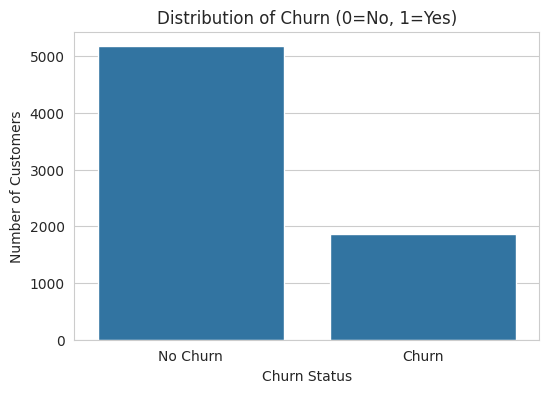


--- EDA: Numerical Feature Distributions ---


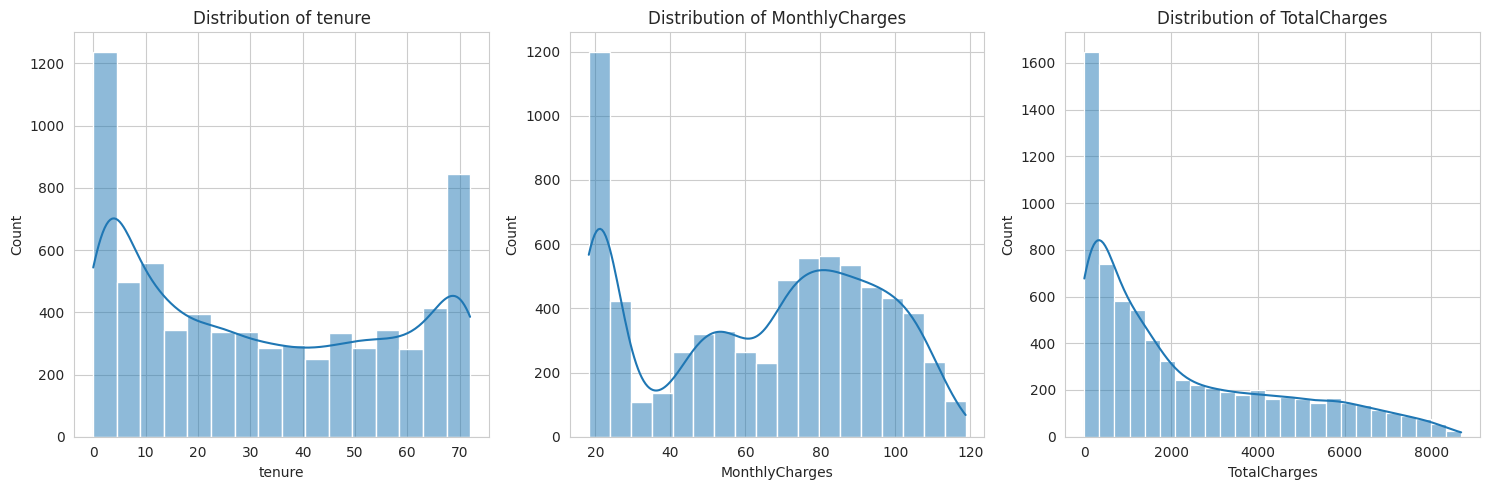


--- EDA: Correlation Heatmap of Numerical Features ---


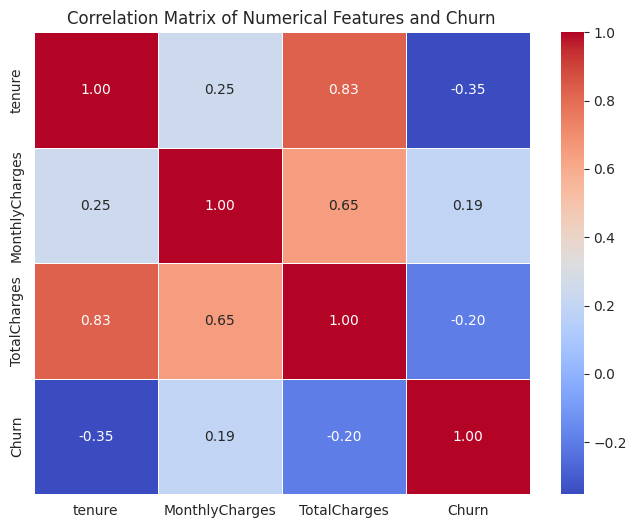

In [ ]:
# --- Continue in your Colab notebook ---

import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots
sns.set_style("whitegrid")

print("\n--- EDA: Initial Overview ---")

# Re-check the churn distribution (which is now 0 and 1)
print("\nChurn Distribution (0=No Churn, 1=Churn):")
print(df_encoded['Churn'].value_counts())
print(df_encoded['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_encoded)
plt.title('Distribution of Churn (0=No, 1=Yes)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

print("\n--- EDA: Numerical Feature Distributions ---")

# Select numerical features for distribution plots (excluding one-hot encoded ones for now)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("\n--- EDA: Correlation Heatmap of Numerical Features ---")
# Calculate the correlation matrix for numerical features and 'Churn'
corr_matrix = df_encoded[numerical_cols + ['Churn']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()


--- EDA: Categorical Feature Analysis vs. Churn ---


/tmp/ipython-input-8-314792952.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate_df_yes, x='Category', y='Churn Rate (%)', palette='viridis')
/tmp/ipython-input-8-314792952.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate_df_yes, x='Category', y='Churn Rate (%)', palette='viridis')
/tmp/ipython-input-8-314792952.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate_df_yes, x='Category', y='Churn Rate (%)', palette='viridis')
/tmp/ipython-input-8-314792952.py:43: FutureWarning: 

Passing `

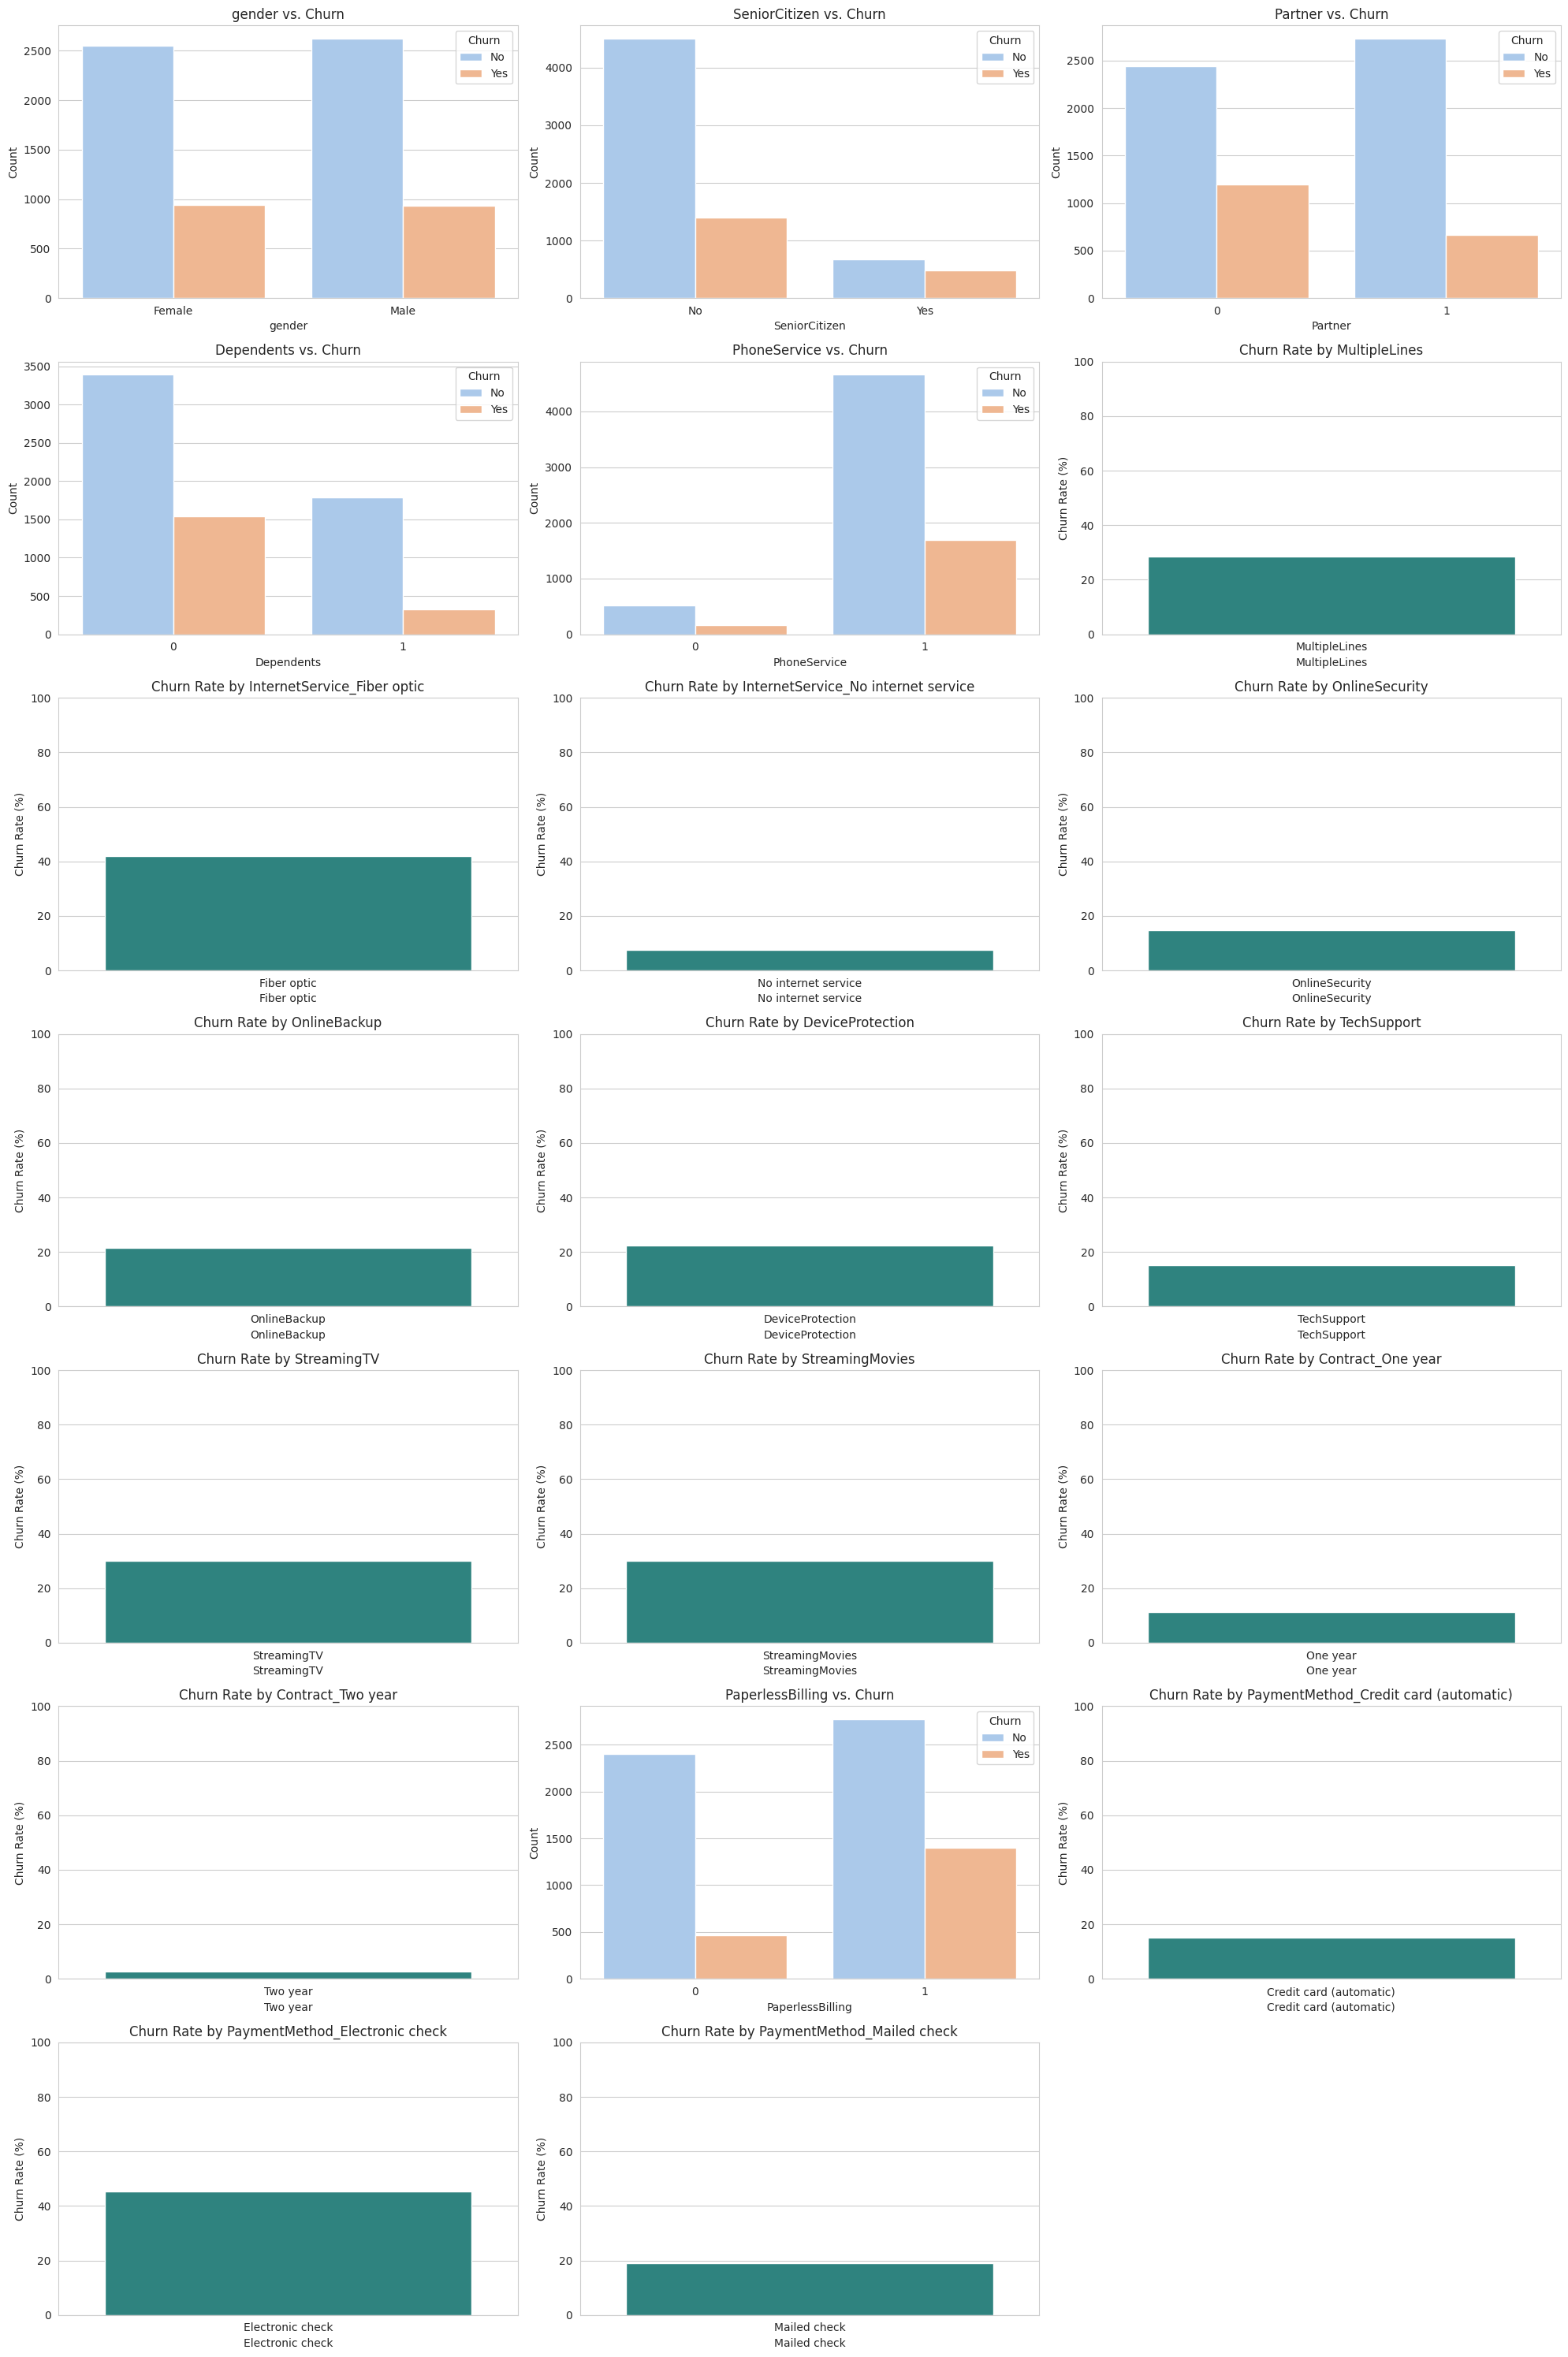


--- Detailed Churn Rates for Key Categorical Features ---

Churn Rate by Contract:
Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

Churn Rate by InternetService:
Churn                        0          1
InternetService                          
DSL                  81.040892  18.959108
Fiber optic          58.107235  41.892765
No internet service  92.595020   7.404980

Churn Rate by PaymentMethod:
Churn                              0          1
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


In [ ]:
# --- Continue in your Colab notebook ---

print("\n--- EDA: Categorical Feature Analysis vs. Churn ---")

# List of categorical columns after one-hot encoding (excluding the one-hot encoded ones themselves)
# We will use the original categorical column names and then use the encoded 0/1 values for plotting
# For 'SeniorCitizen', 'gender', 'Partner', 'Dependents', etc. which are already 0/1.

# Let's re-map SeniorCitizen and gender to their original labels for better plot readability
df_eda = df_encoded.copy() # Create a copy for EDA plotting to avoid re-encoding original df
df_eda['SeniorCitizen'] = df_eda['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df_eda['gender'] = df_eda['gender'].map({0: 'Female', 1: 'Male'})
df_eda['Churn'] = df_eda['Churn'].map({0: 'No', 1: 'Yes'}) # Map Churn back for plot labels

# Now, plot churn rate for various key categorical features
categorical_features_to_plot = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService_Fiber optic', 'InternetService_No internet service', # Using encoded internet service
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies',
    'Contract_One year', 'Contract_Two year', # Using encoded contract
    'PaperlessBilling',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check' # Using encoded payment method
]

plt.figure(figsize=(20, 30)) # Adjust overall figure size

for i, col in enumerate(categorical_features_to_plot):
    plt.subplot(7, 3, i + 1) # Adjust subplot grid based on number of features
    if col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
        sns.countplot(data=df_eda, x=col, hue='Churn', palette='pastel')
        plt.title(f'{col} vs. Churn')
        plt.xlabel(col)
        plt.ylabel('Count')
    elif col in ['InternetService_Fiber optic', 'InternetService_No internet service', 'Contract_One year', 'Contract_Two year',
                 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']:
        # For encoded features, 0 means 'No' (or base category), 1 means 'Yes' (or the specific category)
        # Calculate churn rate for 0 and 1 categories
        churn_rates = df_encoded.groupby(col)['Churn'].mean() * 100
        churn_rates_df = pd.DataFrame({'Category': ['No', 'Yes'], 'Churn Rate (%)': churn_rates.values})
        sns.barplot(data=churn_rates_df, x='Category', y='Churn Rate (%)', palette='viridis')
        plt.title(f'Churn Rate by {col}')
        plt.xlabel(f'{col} (0=No/Base, 1=Yes/Specific)')
        plt.ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

# Additional specific churn rate calculations for easier interpretation
print("\n--- Detailed Churn Rates for Key Categorical Features ---")

# Original Contract (before one-hot encoding for clarity in interpretation)
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Contract:")
print(contract_churn)

# Original InternetService (before one-hot encoding for clarity in interpretation)
internet_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by InternetService:")
print(internet_churn)

# Payment Method (before one-hot encoding for clarity in interpretation)
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by PaymentMethod:")
print(payment_churn)

In [ ]:
!pip install imbalanced-learn

In [ ]:
# --- Continue in your Colab notebook ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # Install if not already available: !pip install imbalanced-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("\n--- Phase 4: Predictive Modeling - Data Preparation ---")

# 1. Define Features (X) and Target (y)
# Drop the 'customerID' column if it wasn't dropped already (it was, but good to double check)
# Also, 'Churn' is our target variable.

# Ensure 'Churn' is our target and remove 'customerID' if still present
if 'customerID' in df_encoded.columns:
    X = df_encoded.drop(['Churn', 'customerID'], axis=1)
else:
    X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# 2. Split Data into Training and Testing Sets
# Stratify by y to maintain the same churn ratio in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Churn distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Churn distribution in test set:\n{y_test.value_counts(normalize=True)}")

# 3. Feature Scaling for Numerical Features
# Identify numerical columns that need scaling.
# These are 'tenure', 'MonthlyCharges', 'TotalCharges'.
# All other columns are already binary (0/1) from encoding.
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Fit the scaler only on the training data and transform both train and test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nNumerical features scaled successfully.")
print("First 5 rows of X_train (scaled numerical features):")
print(X_train.head())

# 4. Handle Imbalance using SMOTE (on training data only!)
print("\n--- Handling Imbalance with SMOTE ---")
print(f"Original training set Churn distribution:\n{y_train.value_counts()}")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\nResampled training set Churn distribution:\n{y_train_resampled.value_counts()}")
print(f"Resampled training set shape: {X_train_resampled.shape}")


--- Phase 4: Predictive Modeling - Data Preparation ---
Features (X) shape: (7043, 23)
Target (y) shape: (7043,)

Train set size: 5634 samples
Test set size: 1409 samples
Churn distribution in training set:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Churn distribution in test set:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64

Numerical features scaled successfully.
First 5 rows of X_train (scaled numerical features):
      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3738       1              0        0           0  0.102371             0   
3151       1              0        1           1 -0.711743             1   
4860       1              0        1           1 -0.793155             0   
3867       0              0        1           0 -0.263980             1   
3810       1              0        1           1 -1.281624             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \

In [ ]:
# --- Continue in your Colab notebook ---

print("\n--- Phase 4: Predictive Modeling - Model Training & Evaluation ---")

# Define a dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_resampled, y_train_resampled) # Train on resampled data
    y_pred = model.predict(X_test)                   # Predict on original (unresampled) test data
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

    # Print results for the current model
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# --- Compare Models ---
print("\n--- Model Comparison Summary ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")


--- Phase 4: Predictive Modeling - Model Training & Evaluation ---

--- Training Logistic Regression ---
Logistic Regression Performance:
Accuracy: 0.7509
Precision: 0.5218
Recall: 0.7353
F1-Score: 0.6104
ROC AUC: 0.8300
Confusion Matrix:
[[783 252]
 [ 99 275]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409


--- Training Decision Tree ---
Decision Tree Performance:
Accuracy: 0.7303
Precision: 0.4935
Recall: 0.6096
F1-Score: 0.5455
ROC AUC: 0.6916
Confusion Matrix:
[[801 234]
 [146 228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1035
           1       0.49      0.61      0.55       374

    accuracy     

In [1]:
# --- Continue in your Colab notebook ---

print("\n--- Phase 5: Insights & Recommendations - Feature Importance ---")

# Use the best model (Gradient Boosting) to get feature importances
best_model = models["Gradient Boosting"] # Access the trained Gradient Boosting model
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\nTop 10 Feature Importances from Gradient Boosting Model:")
print(feature_importances.head(10))

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Churn Prediction (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


--- Phase 5: Insights & Recommendations - Feature Importance ---


NameError: name 'models' is not defined